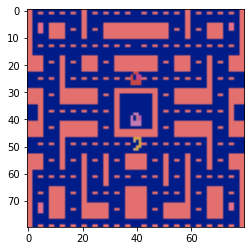

In [9]:
import numpy as np


ghosts_path = 'utils/img_array1619005700.73911.png.npy'
ghost_img = np.load(ghosts_path)

from PIL import Image
im = Image.fromarray(ghost_img, 'RGB')#.convert('RGB')
# im.show()

import matplotlib.pyplot as plt
plt.imshow(ghost_img)
plt.show()

## detect pellets

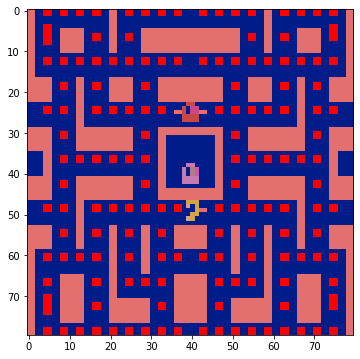

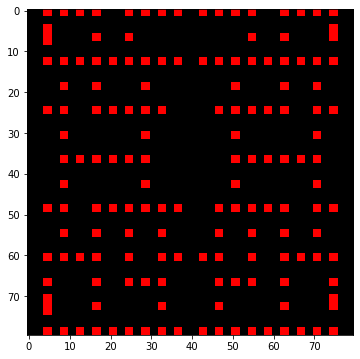

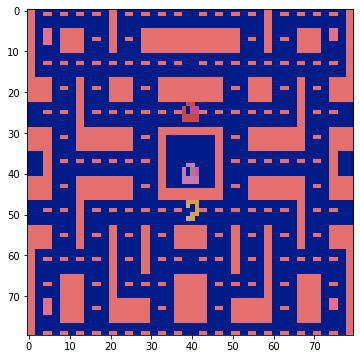

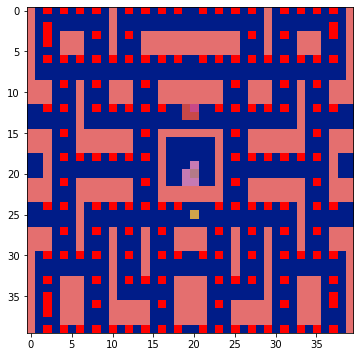

In [14]:
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import watershed#, expand_labels
from skimage.color import label2rgb
from skimage import data
from skimage.draw import rectangle
from skimage.draw import rectangle_perimeter
import pickle

final_img = np.load(ghosts_path)
# final_img = final_img[::2,::2,:]
img = final_img[:,:,0]#.copy()
dummy = np.zeros_like(final_img)

# img = cv2.cvtColor(ghost_img, cv2.COLOR_BGR2GRAY)
# Make segmentation using edge-detection and watershed.
edges = sobel(img)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(img)
foreground, background = 1, 2
markers[img < 30.0] = background
markers[img > 150.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

result=[]
from skimage.measure import regionprops
for region in regionprops(seg1):
    # pellets
    if region.area >= 1 and region.area < 9:
    # ghosts
#     if region.area >= 10 and region.area < 30:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        minr, minc, maxr, maxc = minr-1, minc, maxr-1, maxc-1
#         start, end = (minr, minc), (maxc, maxr)#(minc, minr), (maxc, maxr)
        start, end = (minc, minr), (maxc, maxr)
        assert img.shape == final_img.shape[:-1]
        rr, cc = rectangle(start, end=end)

        final_img[cc, rr] = [255,0,0]
#         result.append((cc[::2],rr[::2]))
        result.append((cc,rr))

        dummy[cc, rr] = [255,0,0]
plt.subplots(figsize=(10, 6))
plt.imshow(final_img)
# plt.imshow(ghost_img)
plt.show()
plt.subplots(figsize=(10, 6))
plt.imshow(dummy)
plt.show()
plt.subplots(figsize=(10, 6))
plt.imshow(ghost_img)
plt.show()
plt.subplots(figsize=(10, 6))
plt.imshow(final_img[::2,::2,:])
# plt.imshow(ghost_img)
plt.show()

In [15]:
result[0]

(array([[0, 0],
        [1, 1]]),
 array([[4, 5],
        [4, 5]]))

In [16]:
# with open ('utils/pellet_locations', 'wb') as fp:
#     pickle.dump(result, fp)

In [17]:
len(result)

151

In [18]:
pellet_list[0][0]

NameError: name 'pellet_list' is not defined

In [19]:
pellet_list[0][1]

NameError: name 'pellet_list' is not defined

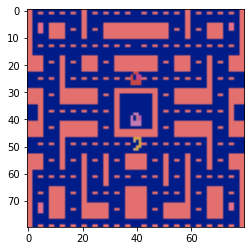

In [20]:
plt.imshow(ghost_img)

In [21]:
len(pellet_list)

NameError: name 'pellet_list' is not defined

In [22]:
final_img

array([[[228, 111, 111],
        [228, 111, 111],
        [  0,  28, 136],
        ...,
        [  0,  28, 136],
        [228, 111, 111],
        [228, 111, 111]],

       [[228, 111, 111],
        [228, 111, 111],
        [  0,  28, 136],
        ...,
        [  0,  28, 136],
        [228, 111, 111],
        [228, 111, 111]],

       [[228, 111, 111],
        [228, 111, 111],
        [  0,  28, 136],
        ...,
        [  0,  28, 136],
        [228, 111, 111],
        [228, 111, 111]],

       ...,

       [[228, 111, 111],
        [228, 111, 111],
        [  0,  28, 136],
        ...,
        [  0,  28, 136],
        [228, 111, 111],
        [228, 111, 111]],

       [[228, 111, 111],
        [228, 111, 111],
        [  0,  28, 136],
        ...,
        [  0,  28, 136],
        [228, 111, 111],
        [228, 111, 111]],

       [[228, 111, 111],
        [228, 111, 111],
        [  0,  28, 136],
        ...,
        [  0,  28, 136],
        [228, 111, 111],
        [228, 111, 111]]

In [24]:
(dummy>0).sum()

624